# RUN BELOW IF IN COLAB

In [ ]:
!wget https://github.com/bharris12/URP_2021_Programming_Course/raw/main/lecture_5/data.zip
!unzip data.zip
!rm data.zip
!ls data

# Imports

In [1]:
#Two Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns


#Mathematical libraries
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import scipy as sp
import pandas as pd

%matplotlib inline

## Learning Goals

1. Reading in data and principles of Tidy Data
2. Processing data to prepare for plotting
3. Principles of plotting
    1. Colors
    2. Showing distributions faithfully
    3. Scaling for the medium of communication


Some of this might be review, but in bioinformatics/data analysis data processing and plotting/communicating are the first and last steps of coding a data-anlysis pipeline. 

<img src="https://qph.fs.quoracdn.net/main-qimg-e7fd43c8c36487389f7bf4f19c52ac2d" />

You will be doing plotting in every step of the data analysis pipeline, so getting comfortable with plotting is crucial

Justin's lecture's about statistics have already covered some of the explore and model part of an analysis, and most of the rest of the lectures will be focusing on a few different examples of those. 

## Background/Lecture

### Quick Introduction to the biology in this lecture

Most of the data in this lecture comes from single cell RNA sequencing (scRNAseq). scRNAseq is a relatively new, but rapidly growing technology for assaying 100s or 1000s and even occasionally millions of individual cells' transcriptomes. 


In short, cells can be separated and barcoded using random DNA sequences before sequencing like normal RNAseq in a variety of different ways. Each method has it's tradeoff. But one constant trait of all the data is sparsity. There are lots of 0s in the data because you are getting a very incomplete sampling of the transcriptome. Yet the method can be extremely useful in studying cell type diversity.

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fnprot.2017.149/MediaObjects/41596_2018_Article_BFnprot2017149_Fig1_HTML.jpg?as=webp" width='500px'/>
(Svensson et al 2018)


The data I am including is all from the mouse motor cortex

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQcdINthsxaWhyKIu3qG07_G-ltSLmptR4ZFoGqs1GEVdz1SDbs" />

The data was generated to specifically look at neuron diversity. There are two main types for neurons, **excitatory**, also known as glutamatergic , and **inhibitory**, also known as GABAergic. The excitatory cell types are named by the layers in the brain they are located in, while the inhibitory ones are named by gene markers.

<img src="http://retina.umh.es/webvision/imageswv/BasicCells.jpg" />

A major focus in studying these cell types is learning how they develop and differentiate from each other. In the case of excitatory cells they develop in the column they will exist in and move from the deeper to shallower layers. For inhibitory cells they develop in another part of the brain, known as the Ganglionic Eminence, and migrate to the cortex. The first major split in defining interneurons is whether they originated in the Medial Ganglionic Eminence (MGE) or the Caudal Ganglionic Eminence (CGE).

<img src="https://www.researchgate.net/publication/321972539/figure/fig1/AS:573998834880512@1513863394719/Migratory-streams-originating-from-the-caudal-ganglionic-eminence-CGE-during-mouse.png" />


#### Some terms I use in the data 

Centroid : The average expression of a cell type. Instead of representing a cell type as all of the cells individually I represent cells as centroids sometimes, where I merely take the average expression of each gene for every cell type



### Reading and processing Columnar/Rectangular Data

#### Flat Files

Flat files can be opened and viewed in any text editor or excel or in the command line. Larger files will give Excel, text editors and your computer issues, so sometimes command line tools are necessary. 

Can be directly viewed in the command line:

Print out entire file:
>$ cat file1.txt 

Print out the top 10 lines:
>$ head file1.txt

Print out the top x lines:
>$ head -n x file1.txt

Print out but allow for scrolling back through output (To escape press q)
>$ less file1.txt




The most common file formats are .txt (text file), .tsv (tab separated value), and .csv (comma separated value)

Columnar data always has a something encoded in the file to separate each column. Depending on the tool you are using to read in the data it can be called different things but the most common names are:

* delimiter (delim)
* separator (sep)
* IFS 

The most common separators are:

* '\t' (tab)
* ',' (comma)
* ' ' (space)
* '\n' (newline)


If you are unsure of what the separator is you can use a head to print out the top of the file 

When reading in these files to python the most common/best functions we use are from numpy and pandas


* np.genfromtxt()
* pd.read_csv() 

> If you google ways to read in text files into python you will find many more ways to read in flat files, but these two functions are the most automated.

I will discuss a few examples of when to use which function after I give a little more info about files.



#### Non-flat/binary
1. .xlxs (Excel File Format) pd.read_excel
2. .h5/.h5f5 (Hierarchical Data Format) pd.read_hdf() or h5py
    1. Often used for big data
    2. Integrated file structure for storing multiple tables of data together (both expression and metadata)


##### Examples
**Your computer doesn't actually care about file extensions, so it isn't uncommon to see a file with a different extension that is really just a flat file** 

All the files below have 100 rows of 10 random numbers

In [2]:
!head -n 1 ./data/file1.txt

0.22 0.26 0.74 0.75 0.77 0.58 0.75 0.97 0.77 0.28


In [3]:
!head -n 1 ./data/file2.txt

0.29	0.53	0.24	0.18	0.91	0.41	0.34	0.32	0.35	0.85


In [4]:
!head -n 1 ./data/file2.csv

0.29	0.53	0.24	0.18	0.91	0.41	0.34	0.32	0.35	0.85


The above output the filename is .csv but the file is tab separated

**The computer reads in your data 1 row at a time, and will interpret a lot about the data based on the first row**

In [5]:
!head -n 1 ./data/file3.csv

0.72,0.80,0.43,0.95,0.36,0.92,1.00,0.16,0.62,0.80


With rectangular data that we are generally working with sometimes there is missing data. As you can see in this modified version of file3.csv there are two commas in a row and only 9 numbers. 

In [6]:
!head -n 2 ./data/file3_1.csv

0.72,,0.43,0.95,0.36,0.92,1.00,0.16,0.62,0.80
0.35,0.31,0.49,0.66,0.73,0.34,0.58,0.12,0.72,0.25


In [7]:
np.genfromtxt('./data/file3_1.csv',delimiter=',')[:2,:]

array([[0.72,  nan, 0.43, 0.95, 0.36, 0.92, 1.  , 0.16, 0.62, 0.8 ],
       [0.35, 0.31, 0.49, 0.66, 0.73, 0.34, 0.58, 0.12, 0.72, 0.25]])

You can see that numpy has replaced that value with a nan. And still interprets the file as having 10 elements in each row

In [9]:
!head -n 2 data/file3_2.csv

0.72,0.43,0.95,0.36,0.92,1.00,0.16,0.62,0.80
0.35,0.31,0.49,0.66,0.73,0.34,0.58,0.12,0.72,0.25


In [10]:
np.genfromtxt('./data/file3_2.csv',delimiter=',')[:2,:]

ValueError: Some errors were detected !
    Line #2 (got 10 columns instead of 9)
    Line #3 (got 10 columns instead of 9)
    Line #4 (got 10 columns instead of 9)
    Line #5 (got 10 columns instead of 9)
    Line #6 (got 10 columns instead of 9)
    Line #7 (got 10 columns instead of 9)
    Line #8 (got 10 columns instead of 9)
    Line #9 (got 10 columns instead of 9)
    Line #10 (got 10 columns instead of 9)
    Line #11 (got 10 columns instead of 9)
    Line #12 (got 10 columns instead of 9)
    Line #13 (got 10 columns instead of 9)
    Line #14 (got 10 columns instead of 9)
    Line #15 (got 10 columns instead of 9)
    Line #16 (got 10 columns instead of 9)
    Line #17 (got 10 columns instead of 9)
    Line #18 (got 10 columns instead of 9)
    Line #19 (got 10 columns instead of 9)
    Line #20 (got 10 columns instead of 9)
    Line #21 (got 10 columns instead of 9)
    Line #22 (got 10 columns instead of 9)
    Line #23 (got 10 columns instead of 9)
    Line #24 (got 10 columns instead of 9)
    Line #25 (got 10 columns instead of 9)
    Line #26 (got 10 columns instead of 9)
    Line #27 (got 10 columns instead of 9)
    Line #28 (got 10 columns instead of 9)
    Line #29 (got 10 columns instead of 9)
    Line #30 (got 10 columns instead of 9)
    Line #31 (got 10 columns instead of 9)
    Line #32 (got 10 columns instead of 9)
    Line #33 (got 10 columns instead of 9)
    Line #34 (got 10 columns instead of 9)
    Line #35 (got 10 columns instead of 9)
    Line #36 (got 10 columns instead of 9)
    Line #37 (got 10 columns instead of 9)
    Line #38 (got 10 columns instead of 9)
    Line #39 (got 10 columns instead of 9)
    Line #40 (got 10 columns instead of 9)
    Line #41 (got 10 columns instead of 9)
    Line #42 (got 10 columns instead of 9)
    Line #43 (got 10 columns instead of 9)
    Line #44 (got 10 columns instead of 9)
    Line #45 (got 10 columns instead of 9)
    Line #46 (got 10 columns instead of 9)
    Line #47 (got 10 columns instead of 9)
    Line #48 (got 10 columns instead of 9)
    Line #49 (got 10 columns instead of 9)
    Line #50 (got 10 columns instead of 9)
    Line #51 (got 10 columns instead of 9)
    Line #52 (got 10 columns instead of 9)
    Line #53 (got 10 columns instead of 9)
    Line #54 (got 10 columns instead of 9)
    Line #55 (got 10 columns instead of 9)
    Line #56 (got 10 columns instead of 9)
    Line #57 (got 10 columns instead of 9)
    Line #58 (got 10 columns instead of 9)
    Line #59 (got 10 columns instead of 9)
    Line #60 (got 10 columns instead of 9)
    Line #61 (got 10 columns instead of 9)
    Line #62 (got 10 columns instead of 9)
    Line #63 (got 10 columns instead of 9)
    Line #64 (got 10 columns instead of 9)
    Line #65 (got 10 columns instead of 9)
    Line #66 (got 10 columns instead of 9)
    Line #67 (got 10 columns instead of 9)
    Line #68 (got 10 columns instead of 9)
    Line #69 (got 10 columns instead of 9)
    Line #70 (got 10 columns instead of 9)
    Line #71 (got 10 columns instead of 9)
    Line #72 (got 10 columns instead of 9)
    Line #73 (got 10 columns instead of 9)
    Line #74 (got 10 columns instead of 9)
    Line #75 (got 10 columns instead of 9)
    Line #76 (got 10 columns instead of 9)
    Line #77 (got 10 columns instead of 9)
    Line #78 (got 10 columns instead of 9)
    Line #79 (got 10 columns instead of 9)
    Line #80 (got 10 columns instead of 9)
    Line #81 (got 10 columns instead of 9)
    Line #82 (got 10 columns instead of 9)
    Line #83 (got 10 columns instead of 9)
    Line #84 (got 10 columns instead of 9)
    Line #85 (got 10 columns instead of 9)
    Line #86 (got 10 columns instead of 9)
    Line #87 (got 10 columns instead of 9)
    Line #88 (got 10 columns instead of 9)
    Line #89 (got 10 columns instead of 9)
    Line #90 (got 10 columns instead of 9)
    Line #91 (got 10 columns instead of 9)
    Line #92 (got 10 columns instead of 9)
    Line #93 (got 10 columns instead of 9)
    Line #94 (got 10 columns instead of 9)
    Line #95 (got 10 columns instead of 9)
    Line #96 (got 10 columns instead of 9)
    Line #97 (got 10 columns instead of 9)
    Line #98 (got 10 columns instead of 9)
    Line #99 (got 10 columns instead of 9)
    Line #100 (got 10 columns instead of 9)

If I remove the second comma numpy will throw an error when I read in the data

In [12]:
!head -n 3 data/file3_2.csv

0.72,0.43,0.95,0.36,0.92,1.00,0.16,0.62,0.80
0.35,0.31,0.49,0.66,0.73,0.34,0.58,0.12,0.72,0.25
0.87,0.45,0.79,0.50,0.15,0.70,0.08,0.01,0.05,0.04


In [11]:
np.genfromtxt('./data/file3_2.csv',delimiter=',', skip_header=1)[:2,:]

array([[0.35, 0.31, 0.49, 0.66, 0.73, 0.34, 0.58, 0.12, 0.72, 0.25],
       [0.87, 0.45, 0.79, 0.5 , 0.15, 0.7 , 0.08, 0.01, 0.05, 0.04]])

But if I skip the first row it the file will be read in, just will be 1 row shorter 

All of the examples I have shown so far has been instances where all of the data is numbers, but we often work with both numerical and categorical data. Numpy does not allow for multiple data types in a single array. 

Numpy defaults to reading in data as a numerical value.

In [15]:
!head data/palmer_species.csv

Adelie
Adelie
Adelie
Adelie
Adelie
Adelie
Adelie
Adelie
Adelie
Adelie


In [16]:
np.genfromtxt('./data/palmer_species.csv',delimiter=',')

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

If you tell numpy that you have string data (str) then it will make the entire array strings

In [17]:
np.genfromtxt('./data/palmer_species.csv',delimiter=',',dtype=str)

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

Instead of using numpy to read in the data you can use pandas dataframe

In [18]:
!head data/palmer_data.csv

0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,,,,,,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,,2007


In [19]:
pd.read_csv('./data/palmer_data.csv').head()

,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
0,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
1,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
2,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Pandas creates, what are called dataframes when you read in data. They have 3 main components. An index (the rownames), columns (column names) and values (data). 

The default nature of read_csv() is to interpret the first row of the data as the header, and to treat every column as a part of the data. It just sets the index to [0,nrows).

In the case of the data I read in above, you can see that the first row of output is bolded, but looks like data, not column names. 

In [20]:
pd.read_csv('./data/palmer_data.csv', header=None).head()

,0,1,2,3,4,5,6,7,8
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Rather telling pandas that there is no header will read in the data correctly. Now you if you look at the first column, the one labeled 0, it has the same values as the index column. That is because this column is supposed to be the index.

In [24]:
pd.read_csv('./data/palmer_data.csv', 
            header=None, 
            index_col=0,
            names=['a','b','c','d','e','f','g','h']).head()

,a,b,c,d,e,f,g,h
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


#### Tidy data

Now you can see that the first column has been moved to the index location in the output.

At this point you might notice and inconsistency between the way pandas is treating the index (rownames) and columns (column names). There is a specific reason for this. 

Pandas subscribes to a data format/philosophy known as tidy data. 

Jeff Leek in his book The Elements of Data Analytic Style summarizes the characteristics of tidy data as the points

1. Each variable you measure should be in one column.
2. Each different observation of that variable should be in a different row.
3. There should be one table for each "kind" of variable.
4. If you have multiple tables, they should include a column in the table that allows them to be linked.

    (Tidy Data Wikipedia Article)[https://en.wikipedia.org/wiki/Tidy_data]
    

If you want to learn more about the penguin data that we are looking you can read about it [here](https://allisonhorst.github.io/palmerpenguins/articles/intro.html)

<img src='https://allisonhorst.github.io/palmerpenguins/man/figures/lter_penguins.png' width='500px'>

#### Review Questions and Mini Exercises

1. When would you use `np.genfromtxt()` vs `pd.read_csv()`

**Answer Here**

2. What are the core principles of tidy data and why does expression data not work well for it?

**Answer Here**

3. Read in diogo_data.csv properly and store as variable named as diogo1_df
    1. None of the data should have Nan's and if it should be read in as a dataframe it should have the correct rownames and column names

In [32]:
!head data/diogo_data.csv

Current Date - 19-JAN-2018
Instrument Serial Number - 8470050176
Software Name - ExpressPro
Version Number - 2.2.3


,,,,,,,Plot2,,,,P2.M1 (Plot2),,,,,,,,,Gains,,,,,,,Compensation,,,,,,,,,,,,, , , , , , , , , , , , , , , , , ,,,,,,,,
Sample Number,Sample ID,Number of Events,Termination Count,Count Gate,Dilution Factor,Original Volume,Type,Params,Gated On,%Gated,%Gated,Cells/L,Total Volume (L),Acquisition Time (s),Date of Acquisition,Time of Acquisition,Date of Analysis,Time of Analysis,FSC Gain,SSC,GRN,YEL,RED,NIR,RED2,NIR2,GRN - %YEL,YEL - %GRN,RED - %YEL,YEL - %RED,RED - %NIR,NIR - %RED,YEL - %NIR,NIR - %YEL,GRN - %RED,RED - %GRN,GRN - %NIR,NIR - %GRN,RED2 - %YEL, YEL - %RED2, RED2 - %RED, RED - %RED2, RED2 - %GRN, GRN - %RED2, RED2 - %NIR, NIR - %RED2, RED2 - %NIR2, NIR2 - %RED2,NIR2 - %YEL, YEL - %NIR2, NIR2 - %RED, RED - %NIR2, NIR2 - %GRN, GRN - %NIR2, NIR2 - %NIR, NIR - %NIR2,Threshold Parameter,Threshold Value,Flow Rate (L/s),High Concentration Warning Trigger,# of Errors & War

In [36]:
diogo1_df = pd.read_csv('data/diogo_data.csv',skiprows=7, index_col='Sample Number')
diogo1_df

,Sample ID,Number of Events,Termination Count,Count Gate,Dilution Factor,Original Volume,Type,Params,Gated On,%Gated,...,NIR2 - %NIR,NIR - %NIR2,Threshold Parameter,Threshold Value,Flow Rate (L/s),High Concentration Warning Trigger,# of Errors & Warnings,User Login Name,User Full Name,WorkList
Sample Number,,,,,,,,,,,,,,,,,,,,,
1,D02,3002,5000,All Events,1.0,10.0,DotPlot,Yellow Fluorescence (YEL-HLog) vs Green Fluore...,Gate 1,100.0,...,0.0,0.0,FSC-HLin,353,0.59,500,1,DESKTOP-9MNKV60\User,Unknown,C:\Users\User\Desktop\Guava\Diogo\20180119_SUI...
2,D03,2973,5000,All Events,1.0,10.0,DotPlot,Yellow Fluorescence (YEL-HLog) vs Green Fluore...,Gate 1,100.0,...,0.0,0.0,FSC-HLin,353,0.59,500,1,DESKTOP-9MNKV60\User,Unknown,C:\Users\User\Desktop\Guava\Diogo\20180119_SUI...
3,D04,3234,5000,All Events,1.0,10.0,DotPlot,Yellow Fluorescence (YEL-HLog) vs Green Fluore...,Gate 1,100.0,...,0.0,0.0,FSC-HLin,353,0.59,500,1,DESKTOP-9MNKV60\User,Unknown,C:\Users\User\Desktop\Guava\Diogo\20180119_SUI...
4,D05,3045,5000,All Events,1.0,10.0,DotPlot,Yellow Fluorescence (YEL-HLog) vs Green Fluore...,Gate 1,100.0,...,0.0,0.0,FSC-HLin,353,0.59,500,1,DESKTOP-9MNKV60\User,Unknown,C:\Users\User\Desktop\Guava\Diogo\20180119_SUI...
5,D06,3135,5000,All Events,1.0,10.0,DotPlot,Yellow Fluorescence (YEL-HLog) vs Green Fluore...,Gate 1,100.0,...,0.0,0.0,FSC-HLin,353,0.59,500,1,DESKTOP-9MNKV60\User,Unknown,C:\Users\User\Desktop\Guava\Diogo\20180119_SUI...
6,D07,3418,5000,All Events,1.0,10.0,DotPlot,Yellow Fluorescence (YEL-HLog) vs Green Fluore...,Gate 1,100.0,...,0.0,0.0,FSC-HLin,353,0.59,500,1,DESKTOP-9MNKV60\User,Unknown,C:\Users\User\Desktop\Guava\Diogo\20180119_SUI...
7,D08,3697,5000,All Events,1.0,10.0,DotPlot,Yellow Fluorescence (YEL-HLog) vs Green Fluore...,Gate 1,100.0,...,0.0,0.0,FSC-HLin,353,0.59,500,1,DESKTOP-9MNKV60\User,Unknown,C:\Users\User\Desktop\Guava\Diogo\20180119_SUI...
8,D09,3530,5000,All Events,1.0,10.0,DotPlot,Yellow Fluorescence (YEL-HLog) vs Green Fluore...,Gate 1,100.0,...,0.0,0.0,FSC-HLin,353,0.59,500,1,DESKTOP-9MNKV60\User,Unknown,C:\Users\User\Desktop\Guava\Diogo\20180119_SUI...
9,D10,3415,5000,All Events,1.0,10.0,DotPlot,Yellow Fluorescence (YEL-HLog) vs Green Fluore...,Gate 1,100.0,...,0.0,0.0,FSC-HLin,353,0.59,500,1,DESKTOP-9MNKV60\User,Unknown,C:\Users\User\Desktop\Guava\Diogo\20180119_SUI...


4. Read in centroids_1.csv properly and store in variable names centroids_1_df

In [37]:
!head data/centroids_numerical.csv

,Cacna1a,Ogt,MGE_score,CGE_score
Astro_Aqp4,3.330592909341582,1069.8812985748166,56.744698,134.1608
CR_Lhx5,46.56341095770166,334.38053776646757,108.58776,89.69111
Endo_Ctla2a,2.9541868292734157,268.51079297476684,109.07178,35.006626
Endo_Cytl1,0.0,489.1354487087236,77.36636,20.236998
L2.3_IT_ALM_Sla,22.197142191933263,364.5264017741929,209.10109,100.46608
L2.3_IT_VISp_Adamts2,25.74983203271572,437.2845105117241,194.84566,120.4393
L2.3_IT_VISp_Agmat,34.7372723183529,421.1552711629804,188.07994,116.31763
L2.3_IT_VISp_Rrad,27.975998757924263,428.4503448702847,190.27806,142.51044
L4_IT_VISp_Rspo1,75.7229999606843,601.0837422657264,182.17783,140.72147


In [39]:
centroids_1_df = pd.read_csv('data/centroids_numerical.csv', index_col=0)
centroids_1_df

,Cacna1a,Ogt,MGE_score,CGE_score
Astro_Aqp4,3.330593,1069.881299,56.744698,134.160800
CR_Lhx5,46.563411,334.380538,108.587760,89.691110
Endo_Ctla2a,2.954187,268.510793,109.071780,35.006626
Endo_Cytl1,0.000000,489.135449,77.366360,20.236998
L2.3_IT_ALM_Sla,22.197142,364.526402,209.101090,100.466080
...,...,...,...,...
Sst_Tac2_Tacstd2,11.289576,280.489303,389.039640,52.225754
VLMC_Osr1_Cd74,4.490497,367.085668,83.957660,35.948875
VLMC_Osr1_Mc5r,1.959513,491.901526,29.655714,30.541874
VLMC_Spp1_Col15a1,9.683650,768.127910,45.826790,29.397020


### Processing data

In [27]:
from palmerpenguins import load_penguins
df = load_penguins()

#### Groupings need to be listed as a column

In [31]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


You last column is species, a categorical variable. This means that we can use it to separate the data out by species 

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

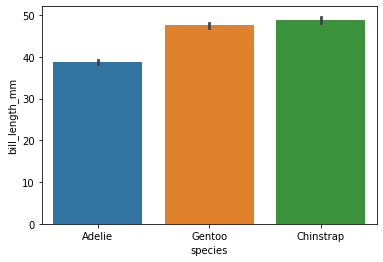

In [40]:
sns.barplot(data=df, x='species', y='bill_length_mm')

#### pd.melt()

But what if I wanted to compare the distributions of different numerical variables. Say see how bill_length and bill_width compare (not within an observation)? 

To do this you need to make the data "tall" using the function pd.melt()

In [41]:
bills_tall = pd.melt(df[['bill_length_mm', 'bill_depth_mm']])
bills_tall.head()

,variable,value
0,bill_length_mm,39.1
1,bill_length_mm,39.5
2,bill_length_mm,40.3
3,bill_length_mm,NaN
4,bill_length_mm,36.7


In [42]:
bills_tall['variable'].unique()

array(['bill_length_mm', 'bill_depth_mm'], dtype=object)

<AxesSubplot:xlabel='variable', ylabel='value'>

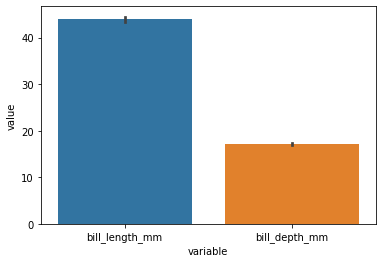

In [43]:
sns.barplot(data=bills_tall,x='variable',y='value')

Now, this is great, but you may notice that we have lost the information about which species each observation came from, when making the data tall, you can add another argument to melt that will bring with each value the species

In [48]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [53]:
bills_tall_species = pd.melt(
    df[['bill_length_mm', 'bill_depth_mm', 'species']], id_vars='species', var_name='measurment',value_name='mm')
bills_tall_species.head()

,species,measurment,mm
0,Adelie,bill_length_mm,39.1
1,Adelie,bill_length_mm,39.5
2,Adelie,bill_length_mm,40.3
3,Adelie,bill_length_mm,NaN
4,Adelie,bill_length_mm,36.7


<AxesSubplot:xlabel='measurment', ylabel='mm'>

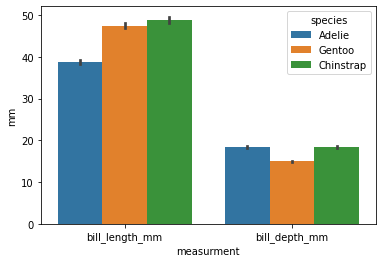

In [54]:
sns.barplot(data=bills_tall_species, x='measurment', y='mm', hue='species')

#### pd.concat()

It is extremely common for data to come in separate files. But we need to join the files together. To use pd.concat()

In [55]:
centroids_numerical = pd.read_csv(
    './data/centroids_numerical.csv', index_col=0)
centroids_numerical.head()

,Cacna1a,Ogt,MGE_score,CGE_score
Astro_Aqp4,3.330593,1069.881299,56.744698,134.160800
CR_Lhx5,46.563411,334.380538,108.587760,89.691110
Endo_Ctla2a,2.954187,268.510793,109.071780,35.006626
Endo_Cytl1,0.000000,489.135449,77.366360,20.236998
L2.3_IT_ALM_Sla,22.197142,364.526402,209.101090,100.466080


In [56]:
centroids_metadata = pd.read_csv('./data/centroids_metadata.csv', index_col=0)
centroids_metadata.head()

,broad_class,subclass
Astro_Aqp4,GLIA,Astro
CR_Lhx5,EXCIT,CR
Endo_Ctla2a,ENDO,Endo
Endo_Cytl1,ENDO,Endo
L2.3_IT_ALM_Sla,EXCIT,L2.3_IT


In [57]:
centroids = pd.concat([centroids_numerical, centroids_metadata],axis=1)
centroids.head()
#The axis=1 tells the function to stick the columns next to eachother

,Cacna1a,Ogt,MGE_score,CGE_score,broad_class,subclass
Astro_Aqp4,3.330593,1069.881299,56.744698,134.160800,GLIA,Astro
CR_Lhx5,46.563411,334.380538,108.587760,89.691110,EXCIT,CR
Endo_Ctla2a,2.954187,268.510793,109.071780,35.006626,ENDO,Endo
Endo_Cytl1,0.000000,489.135449,77.366360,20.236998,ENDO,Endo
L2.3_IT_ALM_Sla,22.197142,364.526402,209.101090,100.466080,EXCIT,L2.3_IT


In [58]:
split_1 = centroids_metadata.iloc[:50]
split_2 = centroids_metadata.iloc[50:]
centroids_metadata.head()

,broad_class,subclass
Astro_Aqp4,GLIA,Astro
CR_Lhx5,EXCIT,CR
Endo_Ctla2a,ENDO,Endo
Endo_Cytl1,ENDO,Endo
L2.3_IT_ALM_Sla,EXCIT,L2.3_IT


In [59]:
pd.concat([split_2,split_1],axis=0).head()

,broad_class,subclass
Lamp5_Plch2_Dock5,CGE,Lamp5
Meis2_Adamts19,EXCIT,Meis2
OPC_Pdgfra_Ccnb1,GLIA,Oligo
OPC_Pdgfra_Grm5,GLIA,Oligo
Oligo_Rassf10,GLIA,Oligo


This time without the axis=1 it sticks the two dataframes on top of each other

#### Computations on existing columns to create new ones

In [60]:
centroids.head()

,Cacna1a,Ogt,MGE_score,CGE_score,broad_class,subclass
Astro_Aqp4,3.330593,1069.881299,56.744698,134.160800,GLIA,Astro
CR_Lhx5,46.563411,334.380538,108.587760,89.691110,EXCIT,CR
Endo_Ctla2a,2.954187,268.510793,109.071780,35.006626,ENDO,Endo
Endo_Cytl1,0.000000,489.135449,77.366360,20.236998,ENDO,Endo
L2.3_IT_ALM_Sla,22.197142,364.526402,209.101090,100.466080,EXCIT,L2.3_IT


In [61]:
#Sometimes you need to add columns based on other columns
centroids['Ogt_zscore'] = stats.zscore(centroids['Ogt'])
centroids['Cacna1a_zscore'] = stats.zscore(centroids['Cacna1a'])

In [62]:
centroids.head()

,Cacna1a,Ogt,MGE_score,CGE_score,broad_class,subclass,Ogt_zscore,Cacna1a_zscore
Astro_Aqp4,3.330593,1069.881299,56.744698,134.160800,GLIA,Astro,5.860758,-1.439872
CR_Lhx5,46.563411,334.380538,108.587760,89.691110,EXCIT,CR,-0.304803,2.019495
Endo_Ctla2a,2.954187,268.510793,109.071780,35.006626,ENDO,Endo,-0.856977,-1.469991
Endo_Cytl1,0.000000,489.135449,77.366360,20.236998,ENDO,Endo,0.992477,-1.706377
L2.3_IT_ALM_Sla,22.197142,364.526402,209.101090,100.466080,EXCIT,L2.3_IT,-0.052096,0.069775


#### Review questions and mini exercises

1. What is the difference between using and not using axis=1 with pd.concat()?


**Answer Here**

In [65]:
centroids[['Cacna1a','Ogt']].sum(axis=0)

Cacna1a     2132.513792
Ogt        37074.107059
dtype: float64

2. Load in example_expression.csv and example_metadata.csv. Then concat them together into a single dataframe named example_df_concat

In [74]:
df1 = pd.read_csv('data/example_expression.csv',index_col=0)
df2 = pd.read_csv('data/example_metadata.csv', index_col=0)
example_df_concat = pd.concat([df1,df2],axis=1)
example_df_concat.head()

,1110008P14Rik,2900055J20Rik,2900079G21Rik,3110035E14Rik,4930447C04Rik,4930461C15Rik,4931440J10Rik,5031426D15Rik,9130024F11Rik,A230050P20Rik,...,Zfp536,Zmat4,Zwint,cluster_label,subclass_label,class_label,cluster_color,size,gene.counts,broad_class
Samples,,,,,,,,,,,,,,,,,,,,,
SM-GE653_S113_E1-50,5.453822,5.453193,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,5.450094,5.455908,Lamp5_Egln3_2,Lamp5,GABAergic,#E69B73,87,5074,CGE
SM-GE653_S114_E1-50,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5.990397,...,5.991343,0.000000,5.987730,Lamp5_Slc35d3,Lamp5,GABAergic,#FFA388,250,5430,CGE
SM-GE653_S115_E1-50,0.000000,5.643465,5.639082,0.0,0.0,0.0,0.0,0.0,0.0,5.641443,...,5.640742,5.641794,5.644020,Lamp5_Pdlim5,Lamp5,GABAergic,#FF7290,65,5092,CGE
SM-GE653_S116_E1-50,0.000000,6.572299,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,6.572129,Lamp5_Egln3_2,Lamp5,GABAergic,#E69B73,87,5074,CGE
SM-GE653_S117_E1-50,5.437279,5.438707,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5.436357,...,5.433648,5.438003,5.439523,Lamp5_Egln3_2,Lamp5,GABAergic,#E69B73,87,5074,CGE


## Exercise 

Goal of analysis: Calculate differential expression between MGE and CGE 

This test is similar to the T-test, however it is non-parametric. Instead of using the Gaussian or normal distribution as a null we make the data uniformly distributed and compare the ranks of the samples for each gene. This makes it more robust to outliers in the data. 

### Read in and preprocess the data

1. Read in data
2. Make some descriptive plots about the metadata (sample sizes and stuff)
    1. Whatever you think is necessary to understand the data

In [75]:
expression = df1
metadata = df2

/Users/bharris/miniconda3/envs/feyn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='broad_class', ylabel='count'>

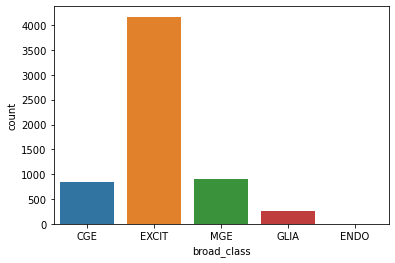

In [80]:
sns.countplot(metadata['broad_class'])


In [85]:
slice_array = np.in1d(metadata['broad_class'],['MGE','CGE'])
metadata = metadata[slice_array]
expression = expression[slice_array]

/Users/bharris/miniconda3/envs/feyn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='broad_class', ylabel='count'>

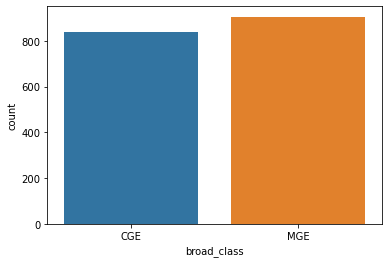

In [86]:
sns.countplot(metadata['broad_class'])

<AxesSubplot:>

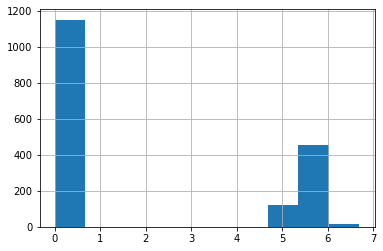

In [89]:
expression.Cacna1e.hist()

### Calculating Mann Whitney U test statistic:
$U_1 = R_1 - ((n_1 * (n_1 + 1)) /2)$

$U_2 = R_2 - ((n_2 * (n_2 + 1)) /2)$

$U = min(U_1, U_2)$

$n_1$ = sample size of group 1

$n_2$ = sample size of group 2

R is sum of the rank (order) of the values 

In [105]:
mge_slice = metadata['broad_class'] == 'MGE'
cge_slice = metadata['broad_class'] == 'CGE'

mge_n = mge_slice.sum()
cge_n = cge_slice.sum()

ranks = expression.rank(axis=0)

U1 = ranks[mge_slice].sum(axis=0) - ((mge_n * (mge_n + 1)) / 2)
U2 = ranks[cge_slice].sum(axis=0) - ((cge_n * (cge_n + 1)) / 2)

U = pd.concat([U1, U2], axis=1).min(axis=1)
U

1110008P14Rik    368611.0
2900055J20Rik    223712.5
2900079G21Rik    256361.0
3110035E14Rik    369981.0
4930447C04Rik    343831.0
                   ...   
Zcchc12          334650.0
Zcchc18          201417.5
Zfp536           211546.0
Zmat4            240429.0
Zwint            211013.0
Length: 400, dtype: float64

### Calculating AUROC from MannWhitney U:

<img src="https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png?w=576" />

The AUROC is a metric used to asses the quality of how well we can predict something. For this case we are measuring how well a gene predicts a specific cell type. 

$\large{AUROC = 1 - \frac{U}{n_1 * n_2}}$

*Hint: AUROCs are values between 0 and 1, but mostly should be between .5 and 1, use a plot to check your results*

In [106]:
U

1110008P14Rik    368611.0
2900055J20Rik    223712.5
2900079G21Rik    256361.0
3110035E14Rik    369981.0
4930447C04Rik    343831.0
                   ...   
Zcchc12          334650.0
Zcchc18          201417.5
Zfp536           211546.0
Zmat4            240429.0
Zwint            211013.0
Length: 400, dtype: float64

In [107]:
mge_n

906

In [108]:
cge_n

838

In [109]:
auroc = 1 - (U / (mge_n * cge_n))
auroc

1110008P14Rik    0.514492
2900055J20Rik    0.705342
2900079G21Rik    0.662340
3110035E14Rik    0.512688
4930447C04Rik    0.547131
                   ...   
Zcchc12          0.559223
Zcchc18          0.734707
Zfp536           0.721367
Zmat4            0.683324
Zwint            0.722069
Length: 400, dtype: float64

<AxesSubplot:ylabel='Count'>

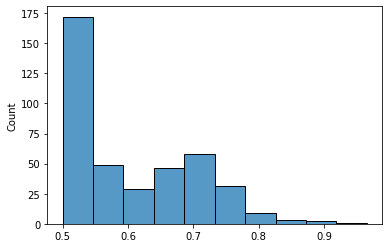

In [110]:
sns.histplot(auroc)

In [111]:
auroc.max()

0.9658613749756332

### Calculate Log2FC

You calculate log2FC by subtracting the average expressions from each other for each gene. Then taking the log2 of the difference. 

Notes:
* You need to store the sign because log doesn't take negative numbers
* You need to add a psuedocount (1) because log doesn't take 0

In [ ]:
##TODO

### Create Volcano Plots

Volcano plots are a common way of displaying results from differential expression. On the X axis you plot the Log2FC and on the Y axis you can plot the AUROC or log10(P value).

In [119]:
n1= mge_n
n2 =cge_n

In [120]:
zscore = np.abs(U - ((n1 * n2)/2) ) / np.sqrt((n1 * n2 * (n1 + n2 + 1))/ 12) 
pvalue = stats.norm.sf(zscore)
padj = sm.stats.fdrcorrection(pvalue)[1]

### Calculating P values (Optional):

$\large{Z = \frac{|U - \frac{n_1 * n_2}{2}|}{\sqrt{\frac{n_1 * n_2 * (n_1 + n_2 + 1)}{12}}}}$


Converting the U statistic is making the values normally distributed so you can then convert those to p values using a normal distribution. 

<img src="http://www.z-table.com/uploads/2/1/7/9/21795380/7807141_orig.png" />

In [ ]:
##TODO

### What if we could have predicted this result?

A post-doc in the Gillis lab (Maggie Crow) analyzed hundreds of results of differential expression experiments and showed that certain genes are more often differentially expressed than others. 

<img src="https://www.pnas.org/content/pnas/116/13/6491/F2.medium.gif" />

As we learned before, AUROCs show how good a prediction is, so the list of genes Maggie came up with has an AUROC of .83, which is exceptionally good. 

This doesn't mean that just because the results are predictable that they aren't interesting, just that it isn't surprising that these results would look like results from other studies

In [ ]:
corrected = sm.stats.multipletests(p,method='fdr_bh')

In [ ]:
results['p_raw'] = p
results['is_sig'] = corrected[0]
results['p_adj'] = corrected[1]

In [ ]:
de_prior = pd.read_csv('./data/mouse_de_prior.csv',index_col=0)

In [ ]:
de_prior.head()

In [ ]:
ax = sns.distplot(
    de_prior.loc[results[results.is_sig].index, 'MF.rank'].dropna(),
    kde=False,
    norm_hist=True)
sns.distplot(de_prior['MF.rank'], ax=ax, kde=False, norm_hist=True)
sns.despine()
plt.show()

## Extra Resources

### SQL and databases

Large tabular data can often use special software for accessing and manipulating data. A common framework for this is known as SQL. Tools like [biomart](http://useast.ensembl.org/biomart/martview/3d270413fa0c7c3dca475d573cbf4897) can be accessed through a web interface or using SQL. SQL can be useful if you need to make repeated or many queries of a bioinformatics database (as an aside R has a package biomarRT for querrying biomart). Using SQL will feel a little similar to pandas.

[SQL Wiki](https://en.wikipedia.org/wiki/SQL)

[Biomart Public SQL server info](https://useast.ensembl.org/info/data/mysql.html)

### Some weird "common file formats"

Some bioinformatics software require specific file formats that are subclasses of other file formats

Here are some examples:

[GCT: A Special Flat Files for Gene Expression](http://software.broadinstitute.org/cancer/software/gsea/wiki/index.php/Data_formats)

[Loom: A Special HDf5 Files for Single Cell Data](http://linnarssonlab.org/loompy/index.html)

Both of these filetypes utilize flat/hdf5 file formats but format them in specific ways to make it easy for the software that they were created for to parse them